*La base des TPs pour le cours "Classification des données" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, auteur Yury Kashnitsky)*



# <center> TP 4 : Apprentissage non supervisé: PCA et clustering

Dans ce TP, vous allez découvrir le fonctionnement des méthodes observées précédemment : K-means, modèle de mélange gaussien (GMM) et clustering agglomératif, dans les tâches de clustering sur les données synthétiques.

Puis il vous faudra appliquer ses méthodes du clustering aux jeux de données réelles MNIST (tâche de reconnaissance manuscrite de chiffres).

**Votre travail consiste à écrire du code et effectuer des calculs dans les cellules ci-dessous.**

Tout d'abord, nous allons initialiser l'environnement, importons tout les bibliothèques nécessaires

In [80]:
### You code here ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. K-means, GMM et clustering agglomératif pour le clustering : données synthétiques

Dans cette partie de TP vous allez appliquer les méthodes du clustering indiquées aux jeux de données synthétiques ci-dessous.

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_16496\2983515749.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:, 0], X1[:, 1], s=30, cmap='viridis');


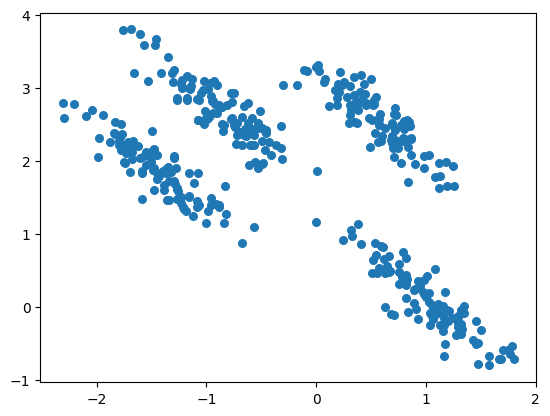

In [81]:
from sklearn.datasets import make_blobs

### 4 ordinary round clusters
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.50, random_state=0)

### 4 ordinary elliptical clusters
rng = np.random.RandomState(13)
X1 = np.dot(X, rng.randn(2, 2))
y1_true = y_true 
plt.scatter(X1[:, 0], X1[:, 1], s=30, cmap='viridis');

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_16496\2016344880.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:, 0], X2[:, 1], s=40, cmap='viridis');


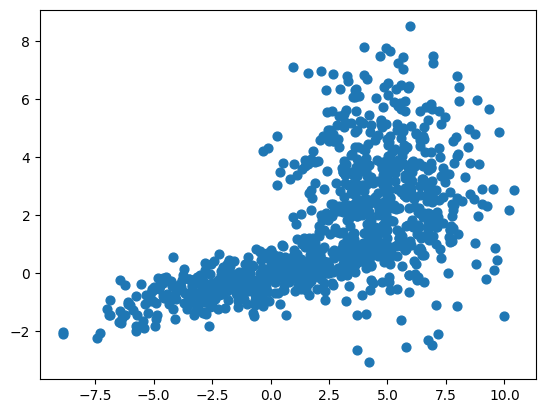

In [124]:
### 2 clusters with different gaussian distributions
np.random.seed(0)
n_samples = 500
X2_1 = 2.0*np.random.randn(n_samples, 2) + np.array([5, 3])
y2_1 = np.zeros(n_samples)
C = np.array([[0., -0.5], [3.5, .7]])
X2_2 = np.dot(np.random.randn(n_samples, 2), C)
y2_2 = np.ones(n_samples)

X2 = np.vstack([X2_1, X2_2])
y2_true = np.vstack([y2_1, y2_2])

plt.scatter(X2[:, 0], X2[:, 1], s=40, cmap='viridis');

**Ex. 1, 2** : 
Séparez en clusters différents les données {X1} et {X2} en entraînant les methodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglomératif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) via sklearn. 

Visualisez avec les couleurs différentes les clusters obtenus et les positions de `centers` (ou `means`). Calculez les mesures de qualité du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

Quelle méthode a la meilleure performance pour chaque exemple de données ?

In [121]:
# You code here
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
model_kmeans=KMeans(n_clusters=4, random_state=0)
model_GMM=GaussianMixture(n_components=4)
model_agloclu=AgglomerativeClustering()

models=[model_kmeans,model_GMM,model_agloclu]

y_pred_kmeans_X1=model_kmeans.fit_predict(X1)
centrs_X1=model_kmeans.cluster_centers_

y_pred_GMM_X1=model_GMM.fit_predict(X1)
GMM_centrs_X1=model_GMM.means_


y_pred_egloclu_X1=model_agloclu.fit_predict(X1)
L, M=np.zeros((1,2)),np.zeros((1,2))
for i in range(len(y_pred_GMM_X1)) :
    if y_pred_GMM_X1[i]==0 :
        L=np.vstack((L,X1[i,:]))
    else :
        M=np.vstack((M,X1[i,:]))

L= np.delete(L,(0), axis = 0)
M = np.delete(M,(0), axis = 0)


y_pred_kmeans_X2=model_kmeans.fit_predict(X2)
centrs_X2=model_kmeans.cluster_centers_


y_pred_GMM_X2=model_GMM.fit_predict(X2)
GMM_centrs_X2=model_GMM.means_

y_pred_egloclu_X2=model_agloclu.fit_predict(X2)
P, T=np.zeros((1,2)),np.zeros((1,2))
for i in range(len(y_pred_GMM_X2)) :
    if y_pred_GMM_X2[i]==0 :
        P=np.vstack((P,X2[i,:]))
    else :
        T=np.vstack((T,X2[i,:]))

P= np.delete(P,(0), axis = 0)
T = np.delete(T,(0), axis = 0)

GMM_centrs_X1



array([[-1.44338843,  1.87089238],
       [ 1.01235505,  0.08636198],
       [-0.87346767,  2.68767259],
       [ 0.55579727,  2.55635917]])

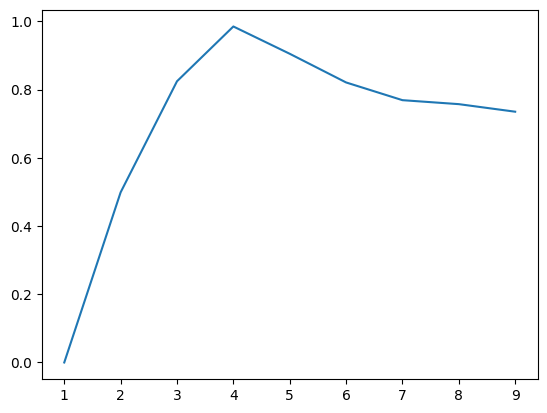

In [84]:
from sklearn.model_selection import validation_curve

train_score, val_score=validation_curve(model_kmeans,X1, y_pred_kmeans_X1,param_name='n_clusters',param_range=np.arange(1,10), cv=5,scoring='adjusted_mutual_info_score')
plt.plot(np.arange(1,10),val_score.mean(axis=1))

In [85]:
def Distance_KMeans(X) :
    L=[]    
    for n_clusters in range (1,15) :
        model=KMeans(n_clusters=n_clusters)
        y_predd=model.fit_predict(X)
        L.append(model.inertia_)
    plt.plot(np.arange(1,15), L)
    plt.xlabel('nbr de clusters')
    plt.ylabel('Distance')
    plt.grid()


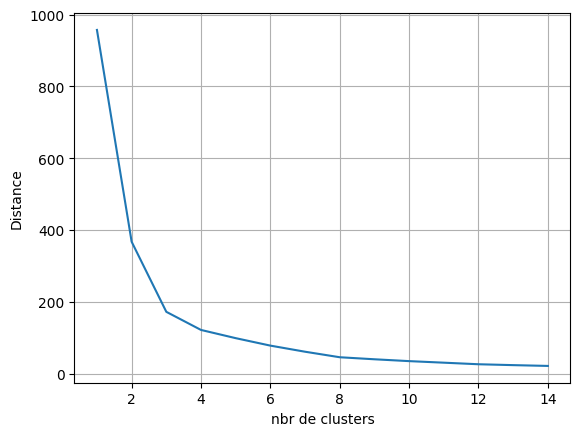

In [86]:
Distance_KMeans(X1)

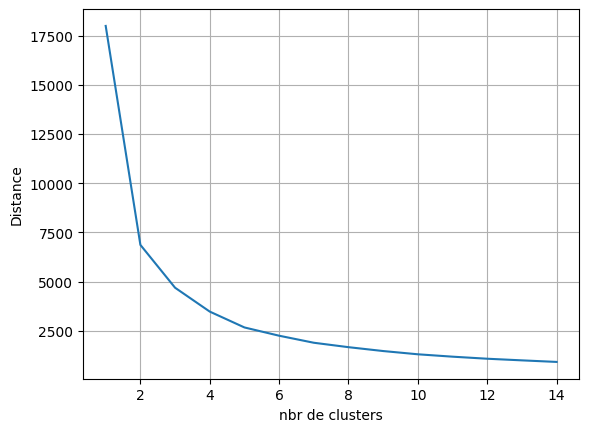

In [87]:
Distance_KMeans(X2)

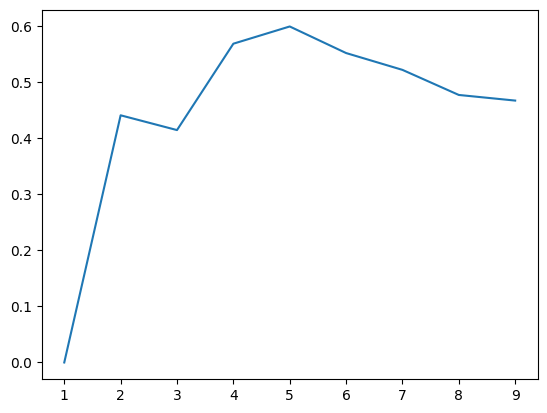

In [88]:
train_score, val_score=validation_curve(model_GMM,X2, y_pred_GMM_X2,param_name='n_components',param_range=np.arange(1,10), cv=5,scoring='adjusted_mutual_info_score')
plt.plot(np.arange(1,10),val_score.mean(axis=1))

In [119]:
def Average(lst):
    return sum(lst) / len(lst)

Text(0.5, 1.0, 'Aggro clustering sur X2')

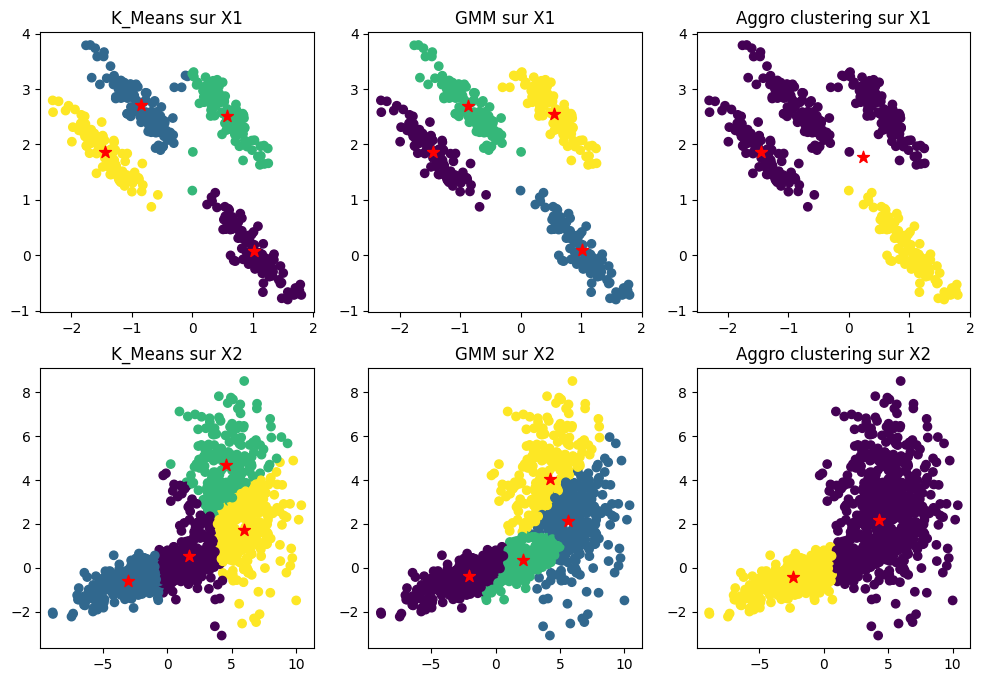

In [122]:
fig, ax=plt.subplots(2,3, figsize=(12,8))
ax[0,0].scatter(X1[:,0],X1[:,1],c=y_pred_kmeans_X1)
ax[0,0].scatter(centrs_X1[:,0], centrs_X1[:,1], s=80,c='r', marker='*')
ax[0,0].set_title('K_Means sur X1')

ax[0,1].scatter(X1[:,0],X1[:,1],c=y_pred_GMM_X1)
ax[0,1].scatter(GMM_centrs_X1[:,0], GMM_centrs_X1[:,1], s=80,c='r', marker='*')
ax[0,1].set_title('GMM sur X1')

ax[0,2].scatter(X1[:,0],X1[:,1],c=y_pred_egloclu_X1)
ax[0,2].scatter(Average(M[:,0]),Average(M[:,1]),s=80,c='r',marker='*')
ax[0,2].scatter(Average(L[:,0]),Average(L[:,1]),s=80,c='r',marker='*')
ax[0,2].set_title('Aggro clustering sur X1')

ax[1,0].scatter(X2[:,0],X2[:,1],c=y_pred_kmeans_X2)
ax[1,0].scatter(centrs_X2[:,0], centrs_X2[:,1], s=80,c='r', marker='*')
ax[1,0].set_title('K_Means sur X2')

ax[1,1].scatter(X2[:,0],X2[:,1],c=y_pred_GMM_X2)
ax[1,1].scatter(GMM_centrs_X2[:,0], GMM_centrs_X2[:,1], s=80,c='r', marker='*')
ax[1,1].set_title('GMM sur X2')

ax[1,2].scatter(X2[:,0],X2[:,1],c=y_pred_egloclu_X2)
ax[1,2].scatter(Average(P[:,0]),Average(P[:,1]),s=80,c='r',marker='*')
ax[1,2].scatter(Average(T[:,0]),Average(T[:,1]),s=80,c='r',marker='*')
ax[1,2].set_title('Aggro clustering sur X2')



 Calculez les mesures de qualité du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

In [127]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score,v_measure_score,silhouette_score
models=[model_kmeans,model_GMM,model_agloclu]

y_pred=[y_pred_kmeans_X1,y_pred_GMM_X1,y_pred_egloclu_X1]
Metrics=pd.DataFrame({
    i:[adjusted_rand_score(j,y1_true),
    adjusted_mutual_info_score(j,y1_true),
    homogeneity_score(j,y1_true),
    completeness_score(j,y1_true),
    v_measure_score(j,y1_true),
    silhouette_score(X1,j)] 
    for i,j in zip (models,y_pred)},
    index=['ARI','AMI','Homogenity','Completeness','V-measure','Silhouette'])
Metrics

,"KMeans(n_clusters=4, random_state=0)",GaussianMixture(n_components=4),AgglomerativeClustering()
ARI,0.960676,1.000000,0.331658
AMI,0.949031,1.000000,0.575511
Homogenity,0.949509,1.000000,1.000000
Completeness,0.949389,1.000000,0.405639
V-measure,0.949449,1.000000,0.577160
Silhouette,0.549361,0.549338,0.580542


In [132]:
y_pred_X2=[y_pred_kmeans_X2,y_pred_GMM_X2,y_pred_egloclu_X2]
MetricsX2=pd.DataFrame({
    i:[adjusted_rand_score(j,y2_true.reshape((1000,))),
    adjusted_mutual_info_score(j,y2_true.reshape((1000,))),
    homogeneity_score(j,y2_true.reshape((1000,))),
    completeness_score(j,y2_true.reshape((1000,))),
    v_measure_score(j,y2_true.reshape((1000,))),
    silhouette_score(X2,j)] 
    for i,j in zip (models,y_pred_X2)},
    index=['ARI','AMI','Homogenity','Completeness','V-measure','Silhouette'])

MetricsX2

,"KMeans(n_clusters=4, random_state=0)",GaussianMixture(n_components=4),AgglomerativeClustering()
ARI,0.258011,0.335540,0.364275
AMI,0.353165,0.406996,0.409028
Homogenity,0.266371,0.306560,0.435173
Completeness,0.528023,0.609137,0.386652
V-measure,0.354106,0.407858,0.409480
Silhouette,0.396838,0.342773,0.522122


## 2. K-means, GMM et clustering agglomératif pour le clustering : données réelles (MNIST)


Dans cette partie on va appliquer les méthodes de clustering étudiées sur les données intégré dans sklearn sur des chiffres manuscrits.

In [133]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y_true = digits.data, digits.target

In [134]:
import seaborn as sns

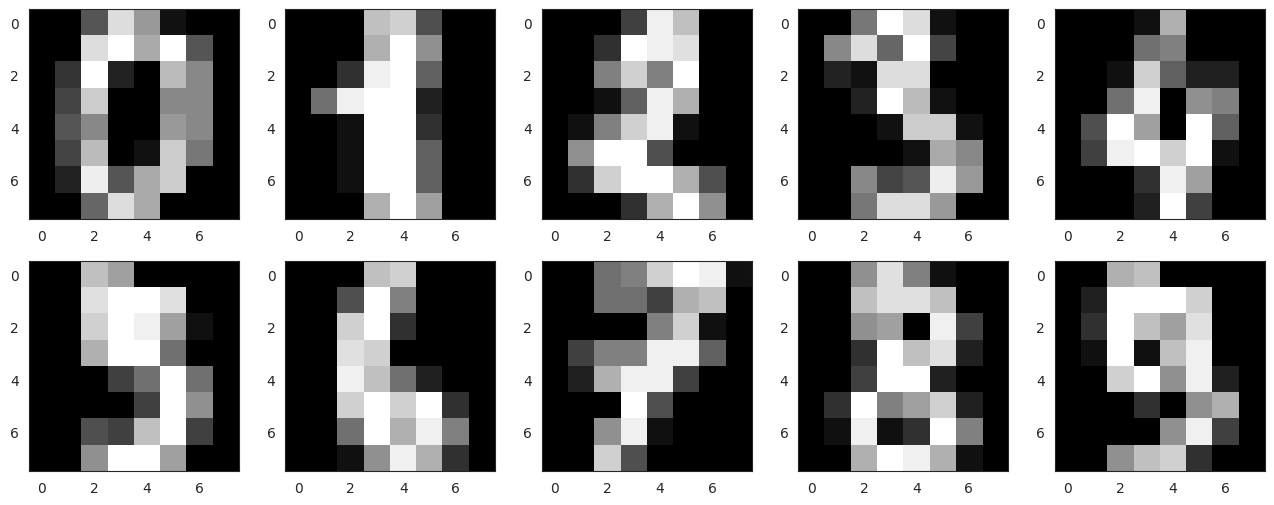

In [135]:
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(X[i,:].reshape([8,8]), cmap='gray'); 

**Ex. 3** : Appliquez les méthodes [`K-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [`GMM`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) et [`clustering agglomératif`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) aux données de chiffres manuscrits. Visualisez les centres de cluster sous forme d'images (c'est-à-dire remodelez chacun en 8x8 et utilisez `plt.imshow`), les clusters semblent-ils être corrélés avec des chiffres particuliers?

In [159]:
# You code here
#Xx=X.reshape((64,))
model1=KMeans(n_clusters=10)
model2=GaussianMixture()
model3=AgglomerativeClustering()
my_predict1=model1.fit_predict(X)
my_predict2=model2.fit_predict(X)
my_predict3=model3.fit_predict(X)



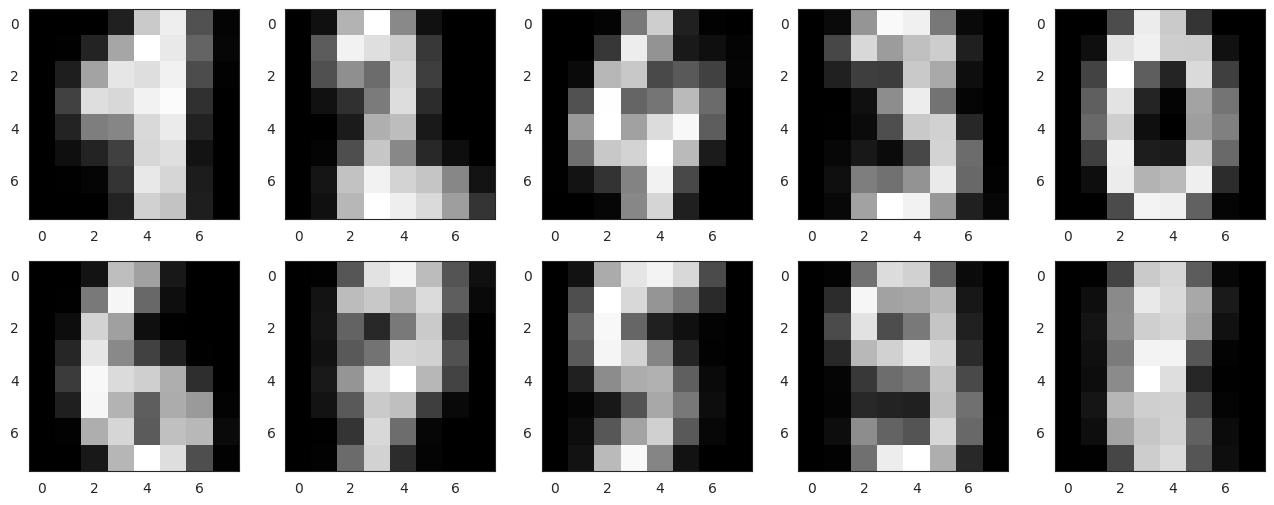

In [160]:
y=model1.cluster_centers_
y.shape
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(y[i,:].reshape([8,8]), cmap='gray'); 


**Ex. 4** : Comparez les algorithmes d'Ex.3 à l'aide de métriques de qualité du clustering : [`ARI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),	[`AMI`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html),	[`Homogenity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html),	[`Completeness`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html),	[`V-measure`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) et	[`Silhouette`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). 

In [ ]:
# You code here

# Mémo sur les mesures de précision

Contrairement à la classification, il est difficile d'évaluer la qualité des résultats du clustering. Ici, une métrique ne peut pas dépendre des étiquettes mais uniquement de la qualité de la division. Deuxièmement, nous n'avons généralement pas de véritables étiquettes des observations lorsque nous utilisons le clustering.

Il existe des mesures de qualité *internes* et *externes*. Les métriques externes utilisent les informations sur la véritable séparation connue tandis que les métriques internes n'utilisent aucune information externe et évaluent la qualité des clusters en se basant uniquement sur les données initiales. Le nombre optimal de clusters est généralement défini par rapport à certaines métriques internes.

Toutes les métriques décrites ci-dessous sont implémentées dans `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Ici, nous supposons que les véritables étiquettes des objets sont connues. Cette métrique ne dépend pas des valeurs des étiquettes mais de la division du cluster de données. Soit $N$ le nombre d'observations dans un échantillon. Soit $a$ le nombre de paires d'observation avec les mêmes étiquettes et situées dans le même cluster, et que $b$ soit le nombre de paires d'observation avec des étiquettes différentes et situées dans différents clusters. L'indice Rand peut être calculé à l'aide de la formule suivante: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$
En d'autres termes, il évalue une part de paires d'observation pour lesquelles ces divisions (résultat initial et clustering) sont cohérentes. L'indice Rand (RI) évalue la similitude des deux divisions du même échantillon. Pour que cet indice soit proche de zéro pour tout résultat de clustering avec n'importe quel $n$ et nombre de clusters, il est essentiel de le mettre à l'échelle, d'où l'indice Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Cette métrique est symétrique et ne dépend pas de la permutation d'étiquette. Par conséquent, cet indice est une mesure des distances entre différentes divisions d'échantillon. $\text{ARI}$ prend des valeurs dans la plage $[-1, 1]$. Les valeurs négatives indiquent l'indépendance des divisions et les valeurs positives indiquent que ces divisions sont cohérentes (elles correspondent à $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

Cette métrique est similaire à $\text{ARI}$. Elle est également symétrique et ne dépend pas des valeurs et de la permutation des étiquettes. Il est défini par la fonction [entropie](https://en.wikipedia.org/wiki/Entropy_(information_theory) et interprète un échantillon divisé comme une distribution discrète (la probabilité d'affecter à un cluster est égal au pourcentage d'objets qu'il contient.) L'index $MI$ est défini comme l'[information mutuelle](https://en.wikipedia.org/wiki/Mutual_information) pour deux distributions, correspondant à l'échantillon divisé en grappes. Intuitivement, les informations mutuelles mesurent la part des informations communes aux deux clusters, c'est-à-dire comment les informations sur l'un d'entre eux diminuent l'incertitude de l'autre.

De la même manière que $\text{ARI}$, $\text{AMI}$ est défini. Cela nous permet de nous débarrasser de l'augmentation de l'indice $MI$ avec le nombre de clusters. Le $\text{AMI}$ se situe dans la gamme $[0, 1]$. Des valeurs proches de zéro signifient que les divisions sont indépendantes, et celles proches de 1 signifient qu'elles sont similaires (avec correspondance complète à $\text{AMI} = 1$).

**Homogénéité, exhaustivité, V-mesure**

Formellement, ces métriques sont également définies en fonction de la fonction d'entropie et de la fonction d'entropie conditionnelle, interprétant les répartitions d'échantillon comme des distributions discrètes: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
où $K$ est un résultat de clustering et $C$ est la division initiale. Par conséquent, $h$ évalue si chaque cluster est composé des mêmes objets de classe, et $c$ mesure dans quelle mesure les mêmes objets de classe s'adaptent aux clusters. Ces métriques ne sont pas symétriques. Les deux se situent dans la plage $[0, 1]$, et des valeurs plus proches de 1 indiquent des résultats de clustering plus précis. Les valeurs de ces métriques ne sont pas mises à l'échelle comme le sont les métriques $\text{ARI}$ ou $\text{AMI}$ et dépendent donc du nombre de clusters. Un résultat de clustering aléatoire n'aura pas de valeurs de mesures plus proches de zéro lorsque le nombre de clusters est suffisamment grand et le nombre d'objets est petit. Dans un tel cas, il serait plus raisonnable d'utiliser $\text{ARI}$. Cependant, avec un grand nombre d'observations (plus de 100) et un nombre de grappes inférieur à 10, ce problème est moins critique et peut être ignoré.

$V$-mesure (𝑉-measure) est une combinaison de $h$ et $c$ et est leur moyenne harmonique:
$$v = 2\frac{hc}{h+c}.$$
Il est symétrique et mesure la cohérence de deux résultats de regroupement.

**Silhouette**

Contrairement aux métriques décrites ci-dessus, ce coefficient n'implique pas la connaissance des véritables étiquettes des objets. Il nous permet d'estimer la qualité du clustering en utilisant uniquement l'échantillon initial sans étiquette et le résultat du clustering. Pour commencer, pour chaque observation, le coefficient de silhouette est calculé. Soit $a$ la moyenne de la distance entre un objet et d'autres objets au sein d'un cluster et $b$ la distance moyenne d'un objet aux objets du cluster le plus proche (différente de celle à laquelle appartient l'objet). Ensuite, la mesure de silhouette pour cet objet est $$s = \frac{b - a}{\max(a, b)}.$$

La silhouette d'un échantillon est une valeur moyenne des valeurs de silhouette de cet échantillon. Par conséquent, la distance de la silhouette montre dans quelle mesure la distance entre les objets d'une même classe diffère de la distance moyenne entre les objets de différents groupes. Ce coefficient prend des valeurs dans la plage $[-1, 1]$. Des valeurs proches de -1 correspondent à de mauvais résultats de clustering tandis que des valeurs plus proches de 1 correspondent à des clusters denses et bien définis. Par conséquent, plus la valeur de silhouette est élevée, meilleurs sont les résultats du clustering.

À l'aide de silhouette, nous pouvons identifier le nombre optimal de grappes $k$ (si nous ne le savons pas déjà à partir des données) en prenant le nombre de grappes qui maximise le coefficient de silhouette.